# 2º Semana

Como na primeira semana eu separei e organizei os dados conforme notebook: [1º Semana](https://github.com/Dev-Zz/alura_challenge/blob/main/Alura%20Challenge/Alura%20Challenge%20Semana%201.ipynb), irei importar esses dados para próximos trabalhos.

## Leitura do arquivo da 1º Semana

In [21]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
from dython.nominal import associations

dataset = pd.read_csv(r'C:\Users\Jose Eduardo\Documents\GitHub\alura_challenge\alura_challenge_1_semana.csv')

In [2]:
def plot_countplot(data, x, title, label_x: str, figsize: tuple = (8, 5), hue=None, small: bool = True):
    plt.figure(figsize=figsize)
    custom_params = {"axes.spines.right": False, "axes.spines.top": False,
                     "axes.spines.left": False, "axes.spines.bottom": True,}
    
    sns.set_theme(style="whitegrid", rc=custom_params)
    ax = sns.countplot(x=x, hue=hue, data=data, palette='viridis')
    
    ax.set(ylabel=None)
    ax.get_yaxis().set_visible(True)

    plt.title(title, fontsize=22, loc='left', pad=50)
    plt.xlabel(label_x, fontsize=17, labelpad=20)
    plt.xticks(fontsize=15)

    for container in ax.containers:
        if small:
            ax.bar_label(container, fontsize=15)
        else:
            ax.bar_label(container, fontsize=15, padding=-17, color='black')

    plt.show()

In [3]:
def heatmap_corr(df, figsize: tuple = (8, 6)):
    corr = df.corr()
    plt.figure(figsize=figsize)
    sns.heatmap(corr,
                xticklabels=corr.columns.values,
                yticklabels=corr.columns.values,
                annot=True,
                cmap='viridis')

In [4]:
dataset.head(3)

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Meses de Contrato,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,...,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
0,0002-ORFBO,Não,Feminino,Não,Sim,Sim,9,Sim,Não,DSL,...,Não,Sim,Sim,Não,Um ano,Sim,Cheque,65.6,593.30,2.186667
1,0003-MKNFE,Não,Masculino,Não,Não,Não,9,Sim,Sim,DSL,...,Não,Não,Não,Sim,Mês a mês,Não,Cheque,59.9,542.40,1.996667
2,0004-TLHLJ,Sim,Masculino,Não,Não,Não,4,Sim,Não,Fibra ótica,...,Sim,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico,73.9,280.85,2.463333


## Analisar a variável target: Churn

Nos foi passado que devemos analisar a variável Churn, para isso usarei o **.describe()**

In [5]:
dataset.describe().round(2)

,Meses de Contrato,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
count,7043.00,7043.00,7043.00,7043.00
mean,32.37,64.76,2279.80,2.16
std,24.56,30.09,2266.73,1.00
min,0.00,18.25,18.80,0.61
25%,9.00,35.50,398.55,1.18
50%,29.00,70.35,1394.55,2.35
75%,55.00,89.85,3786.60,3.00
max,72.00,118.75,8684.80,3.96


In [6]:
dataset.describe(include=[object])

,Identificação do Cliente,Churn,Sexo,Idoso,Casado,Dependentes,Serviço Telefônico,Multiplas Linhas,Serviço de Internet,Proteção Internet,Backup Online,Proteção Dispositivo,Suporte Técnico,TV a Cabo,Stremaming Filmes,Tipo do Contrato,Fatura Online,Forma de Pagamento
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,0002-ORFBO,Não,Masculino,Não,Não,Não,Sim,Não,Fibra ótica,Não,Não,Não,Não,Não,Não,Mês a mês,Sim,Cheque eletrônico
freq,1,5174,3555,5901,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365


In [7]:
churn = pd.merge(
    left = dataset['Churn'].value_counts(sort = False),
    right = dataset['Churn'].value_counts(normalize=True, sort = False),
    left_index = True,
    right_index = True
)

churn.rename(columns={
    'Churn_x': 'Frequências',
    'Churn_y': 'Percentual'}, inplace = True)

churn.rename_axis('Churn', inplace = True)
churn

,Frequências,Percentual
Churn,,
Não,5174,0.73463
Sim,1869,0.26537


In [8]:
churn.style.format({'Percentual': '{:.2%}'})

,Frequências,Percentual
Churn,,
Não,5174,73.46%
Sim,1869,26.54%


## Criar Visualizações Relevantes do Dataset

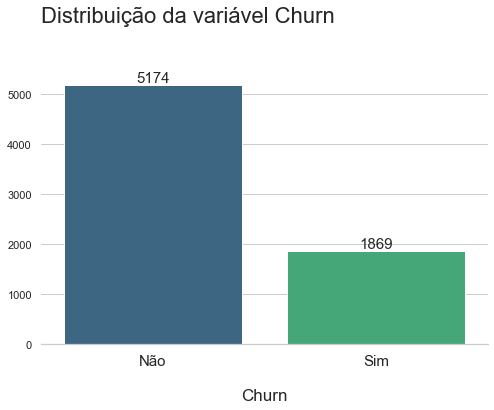

In [9]:
plot_countplot(data=dataset,
               x='Churn',
               title='Distribuição da variável Churn',
               label_x='Churn')

**Conforme acima percebemos que 26.54% de nossos clientes são Churn, isso é um número ALTO, por isso criaremos novas visualizações abaixo para encontrar a persona do Churn.**

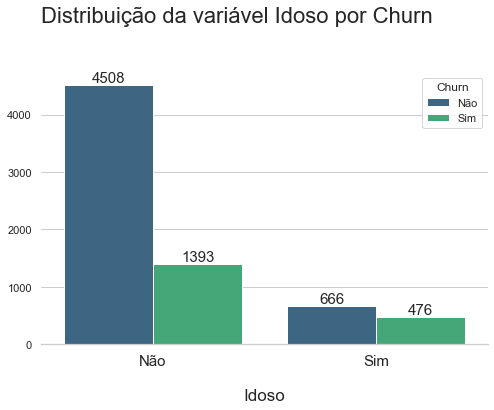

In [10]:
plot_countplot(data=dataset,
               x='Idoso',
               title='Distribuição da variável Idoso por Churn',
               label_x='Idoso',
               hue='Churn')

**Na distribuição da variável Idoso por Churn, conseguimos verificar que dos poucos Idosos que temos em nosso conjunto de dados, 71,47% são Churn.**

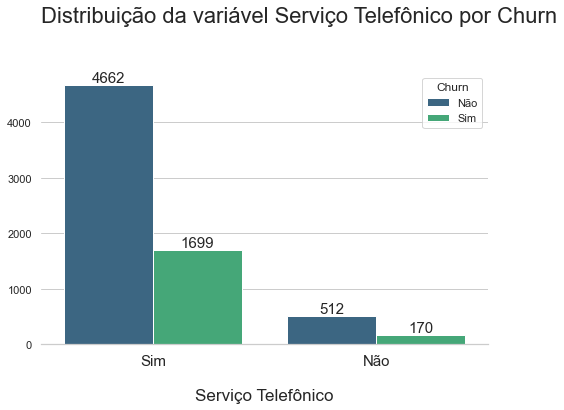

In [11]:
plot_countplot(data=dataset,
               x='Serviço Telefônico',
               title='Distribuição da variável Serviço Telefônico por Churn',
               label_x='Serviço Telefônico',
               hue='Churn')

**Na distribuição da variável Serviço Telefônico por Churn, conseguimos verificar que a MAIORIA dos nossos Churns tinham esse serviço contratado.**

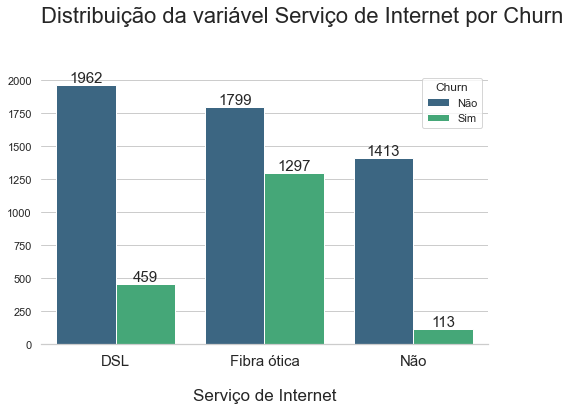

In [12]:
plot_countplot(data=dataset,
               x='Serviço de Internet',
               title='Distribuição da variável Serviço de Internet por Churn',
               label_x='Serviço de Internet',
               hue='Churn')

**Na distribuição da variável Serviço de Internet por Churn, podemos observar uma grande quantidade de Churn nos clientes que possuiam o serviço Fibra ótica, precisamos entender o por que. Valor do serviço? Qualidade do serviço?**

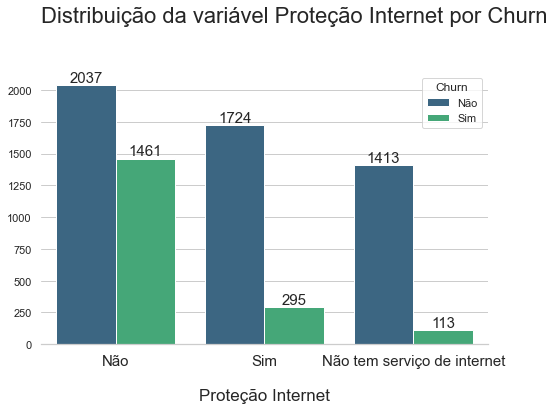

In [13]:
plot_countplot(data=dataset,
               x='Proteção Internet',
               title='Distribuição da variável Proteção Internet por Churn',
               label_x='Proteção Internet',
               hue='Churn')

**Na distribuição da variável Proteção Internet por Churn, podemos observar uma grande quantidade de Churn nos clientes que NÃO possuem o serviço de Proteção Internet.**

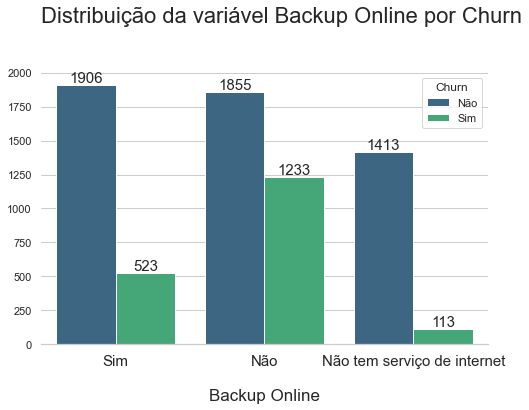

In [14]:
plot_countplot(data=dataset,
               x='Backup Online',
               title='Distribuição da variável Backup Online por Churn',
               label_x='Backup Online',
               hue='Churn')

**Na distribuição da variável Backup Online por Churn, podemos observar uma grande quantidade de Churn nos clientes que NÃO possuem o serviço de Backup Online.**

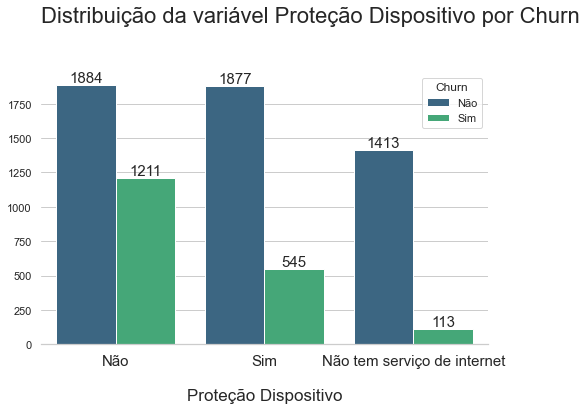

In [15]:
plot_countplot(data=dataset,
               x='Proteção Dispositivo',
               title='Distribuição da variável Proteção Dispositivo por Churn',
               label_x='Proteção Dispositivo',
               hue='Churn')

**Na distribuição da variável Proteção Dispositivo por Churn, podemos observar uma grande quantidade de Churn nos clientes que NÃO possuem o serviço de Proteção Dispositivo.**

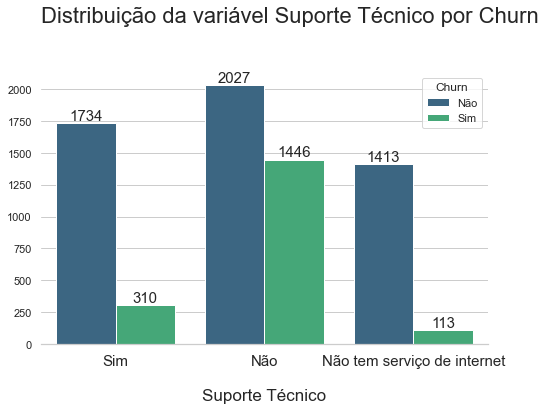

In [16]:
plot_countplot(data=dataset,
               x='Suporte Técnico',
               title='Distribuição da variável Suporte Técnico por Churn',
               label_x='Suporte Técnico',
               hue='Churn')

**Na distribuição da variável Suporte Técnico por Churn, podemos observar uma grande quantidade de Churn nos clientes que NÃO possuem o serviço de Suporte Técnico.**

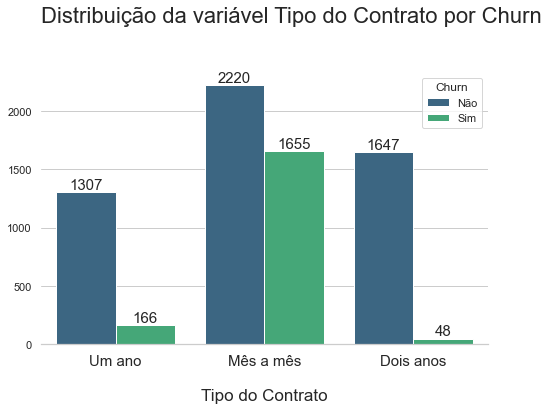

In [17]:
plot_countplot(data=dataset,
               x='Tipo do Contrato',
               title='Distribuição da variável Tipo do Contrato por Churn',
               label_x='Tipo do Contrato',
               hue='Churn')

**Na distribuição da variável Tipo de Contrato por Churn, podemos observar uma grande quantidade de Churn nos clientes que optaram pelo contrato mês a mês.**

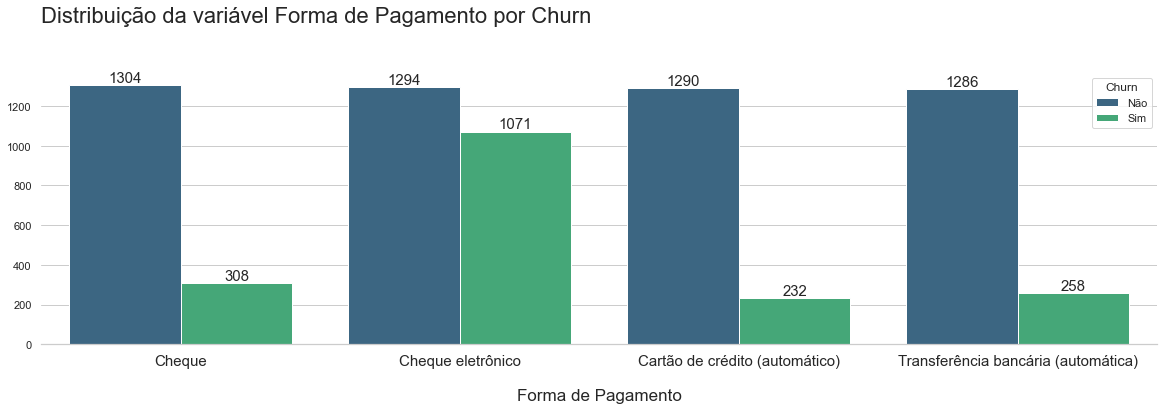

In [18]:
plot_countplot(data=dataset,
               figsize=(20,5),
               x='Forma de Pagamento',
               title='Distribuição da variável Forma de Pagamento por Churn',
               label_x='Forma de Pagamento',
               hue='Churn')

**Na distribuição da variável Forma de Pagamento por Churn, podemos observar uma grande quantidade de Churn nos clientes que optaram por Cheque eletrônico.**

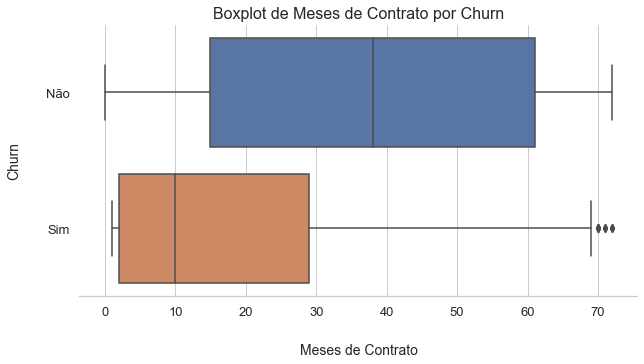

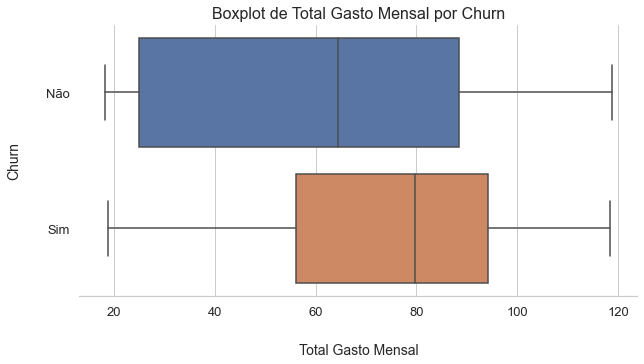

In [19]:
for col in ['Meses de Contrato', 'Total Gasto Mensal']:
    plt.figure(figsize=(10,5))
    sns.boxplot(x=col, y='Churn', data=dataset)
    plt.title(f'Boxplot de {col} por Churn', fontsize=16)
    plt.xlabel(col,fontsize=14,labelpad=25)
    plt.ylabel('Churn',fontsize=14,labelpad=25)
    plt.xticks(fontsize=13)
    plt.yticks(fontsize=13)
    plt.show()

**Verificando o Meses de Contrato, é possível identificar que os Churns estão concentrados em clientes com menor tempo de serviço contratado.**


**Verificando o Total Gasto Mensal, é possivel identificar que os Churns estão concentrados em clientes que contrataram os serviçoes mais caros.**

## Análise de Correlação das Variáveis

In [20]:
dataset.corr()

,Meses de Contrato,Total Gasto Mensal,Total Gasto Anual,Total Gasto Diário
Meses de Contrato,1.000000,0.247900,0.826164,0.247900
Total Gasto Mensal,0.247900,1.000000,0.651182,1.000000
Total Gasto Anual,0.826164,0.651182,1.000000,0.651182
Total Gasto Diário,0.247900,1.000000,0.651182,1.000000


In [35]:
dataset2 = dataset.copy()
dataset2.drop(columns=['Identificação do Cliente'], inplace=True)

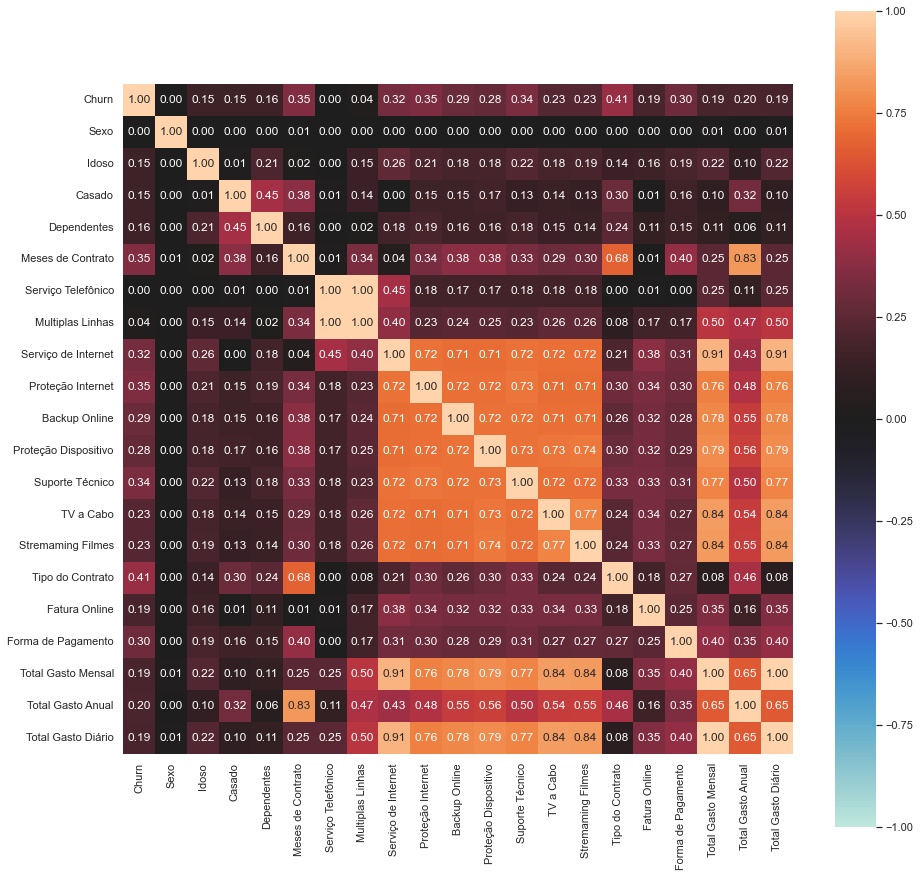

In [39]:
ax = associations(dataset2, figsize=(15,15))